Import Librairies

In [50]:
import pandas as pd
import seaborn as sns
import pathlib as Path
import matplotlib.pyplot as plt
import sklearn

import numpy as np
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


import os
print(os.listdir("../input"))


['train.csv', 'sample_submission.csv', 'test.csv']


## Exploration DataTrain

In [51]:
df_train = pd.read_csv('../input/train.csv')
df_train.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [52]:
df_train = df_train[df_train['passenger_count'] >= 1] 
df_train = df_train[df_train['trip_duration'] <= 5000]

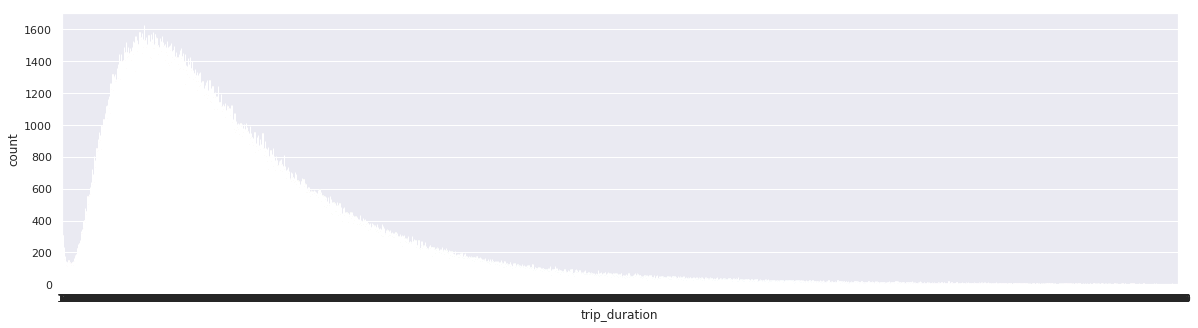

In [53]:
plt.figure(figsize=(20, 5))
sns.set(style="darkgrid")
sns.countplot(x="trip_duration", data=df_train);

In [54]:
df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'])
df_train['year'] = df_train['pickup_datetime'].dt.year
df_train['month'] = df_train['pickup_datetime'].dt.month
df_train['day'] = df_train['pickup_datetime'].dt.day
df_train['hour'] = df_train['pickup_datetime'].dt.hour
df_train['minute'] = df_train['pickup_datetime'].dt.minute
df_train['second'] = df_train['pickup_datetime'].dt.second

In [55]:
df_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,year,month,day,hour,minute,second
count,1.454812e+06,1.454812e+06,1.454812e+06,1.454812e+06,1.454812e+06,1.454812e+06,1.454812e+06,1454812.0,1.454812e+06,1.454812e+06,1.454812e+06,1.454812e+06,1.454812e+06
mean,1.534249e+00,1.663975e+00,-7.397360e+01,4.075099e+01,-7.397347e+01,4.075184e+01,8.311068e+02,2016.0,3.515951e+00,1.550305e+01,1.360721e+01,2.959278e+01,2.947441e+01
std,4.988258e-01,1.313638e+00,7.080408e-02,3.278490e-02,7.054338e-02,3.578846e-02,6.359397e+02,0.0,1.680934e+00,8.703746e+00,6.401092e+00,1.732503e+01,1.731956e+01
min,1.000000e+00,1.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,2016.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073740e+01,-7.399133e+01,4.073592e+01,3.960000e+02,2016.0,2.000000e+00,8.000000e+00,9.000000e+00,1.500000e+01,1.400000e+01
50%,2.000000e+00,1.000000e+00,-7.398175e+01,4.075413e+01,-7.397976e+01,4.075454e+01,6.610000e+02,2016.0,4.000000e+00,1.500000e+01,1.400000e+01,3.000000e+01,2.900000e+01
75%,2.000000e+00,2.000000e+00,-7.396737e+01,4.076837e+01,-7.396304e+01,4.076983e+01,1.071000e+03,2016.0,5.000000e+00,2.300000e+01,1.900000e+01,4.500000e+01,4.400000e+01
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,5.000000e+03,2016.0,6.000000e+00,3.100000e+01,2.300000e+01,5.900000e+01,5.900000e+01


## Usefull Columns

In [56]:
selected_columns = ['passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
                  'dropoff_latitude','year','month','day','hour','minute',
                  'second']

In [57]:
X_train = df_train[selected_columns]
y_train = df_train['trip_duration']


In [58]:
rf = RandomForestRegressor()
random_split = ShuffleSplit(n_splits=3, test_size=0.05, train_size=0.1, random_state=0)
looses = -cross_val_score(rf, X_train, y_train, cv=random_split, scoring='neg_mean_squared_log_error')
looses = [np.sqrt(l) for l in looses]
np.mean(looses)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.45043953717742385

In [59]:
rf.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [60]:
df_test = pd.read_csv('../input/test.csv')
df_test['pickup_datetime'] = pd.to_datetime(df_test['pickup_datetime'])
df_test.head()


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [61]:
df_test['pickup_datetime'] = pd.to_datetime(df_test['pickup_datetime'])
df_test['year'] = df_test['pickup_datetime'].dt.year
df_test['month'] = df_test['pickup_datetime'].dt.month
df_test['day'] = df_test['pickup_datetime'].dt.day
df_test['hour'] = df_test['pickup_datetime'].dt.hour
df_test['minute'] = df_test['pickup_datetime'].dt.minute
df_test['second'] = df_test['pickup_datetime'].dt.second

In [62]:
X_test = df_test[selected_columns]

In [63]:
y_pred = rf.predict(X_test)
y_pred.mean()

843.9734306564669

In [64]:
submission = pd.read_csv('../input/sample_submission.csv')
submission['trip_duration'] = y_pred
submission.to_csv('submission.csv', index=False)